In [2]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Crop_recommendation.csv')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,main_crop,comp_crop,trap_crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,Duckweed,Pusa Basmati
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,Duckweed,Pusa Basmati
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,Duckweed,Pusa Basmati
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,Duckweed,Pusa Basmati
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,Duckweed,Pusa Basmati


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,main_crop,comp_crop,trap_crop
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,beans,vetch
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,beans,vetch
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,beans,vetch
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,beans,vetch
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,beans,vetch


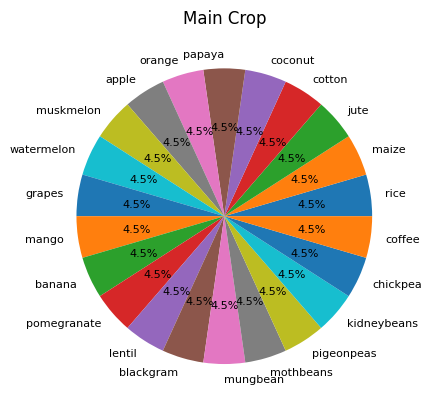

In [6]:
crop_counts = df['main_crop'].value_counts()
plt.pie(crop_counts.values, labels=crop_counts.index, autopct='%1.1f%%',textprops={'fontsize': 8})
plt.title('Main Crop')
plt.show()

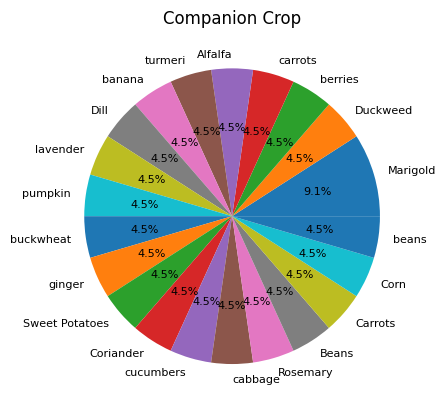

In [7]:
crop_counts1 = df['comp_crop'].value_counts()
plt.pie(crop_counts1.values, labels=crop_counts1.index, autopct='%1.1f%%',textprops={'fontsize': 8})
plt.title('Companion Crop')
plt.show()

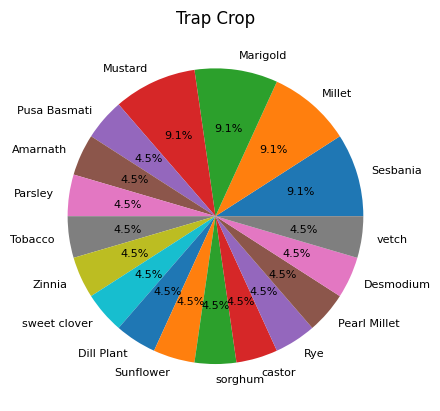

In [8]:
crop_counts2 = df['trap_crop'].value_counts()
plt.pie(crop_counts2.values, labels=crop_counts2.index, autopct='%1.1f%%',textprops={'fontsize': 8})
plt.title('Trap Crop')
plt.show()

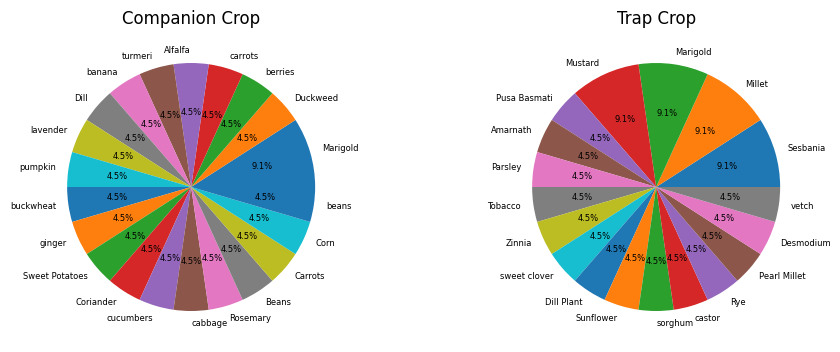

In [9]:



crop_counts1 = df['comp_crop'].value_counts()
crop_counts2 = df['trap_crop'].value_counts()

# Create a figure with two axes side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first pie chart on the left axis
axs[0].pie(crop_counts1, labels=crop_counts1.index, autopct='%1.1f%%',textprops={'fontsize': 6})
axs[0].set_title('Companion Crop')

# Plot the second pie chart on the right axis
axs[1].pie(crop_counts2, labels=crop_counts2.index, autopct='%1.1f%%',textprops={'fontsize': 6})
axs[1].set_title('Trap Crop')

# Display the chart
plt.subplots_adjust(wspace=0.5)
plt.show()

In [10]:
df.size

22000

In [11]:
df.shape

(2200, 10)

In [12]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'main_crop',
       'comp_crop', 'trap_crop'],
      dtype='object')

In [13]:
df['main_crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [14]:
df['comp_crop'].unique()

array(['Duckweed', 'Marigold', 'Corn', 'Carrots', 'Beans', 'Rosemary',
       'cabbage', 'cucumbers', 'Coriander', 'Sweet Potatoes', 'ginger',
       'berries', 'buckwheat', 'pumpkin', 'lavender', 'Dill', 'banana',
       'turmeri', 'Alfalfa', 'carrots', 'beans'], dtype=object)

In [15]:
df['trap_crop'].unique()

array(['Pusa Basmati', 'sorghum', 'Desmodium', 'Sesbania', 'Pearl Millet',
       'Rye', 'castor', 'Marigold', 'Mustard', 'Dill Plant', 'Sunflower',
       'Amarnath', 'sweet clover', 'Millet', 'Zinnia', 'Tobacco',
       'Parsley', 'vetch'], dtype=object)

In [16]:
df['main_crop'] = df['main_crop'].astype('string')
df['comp_crop'] = df['comp_crop'].astype('string')
df['trap_crop'] = df['trap_crop'].astype('string')

In [17]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
main_crop       string
comp_crop       string
trap_crop       string
dtype: object

In [18]:
df['main_crop'].value_counts()


rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: main_crop, dtype: Int64

In [19]:
df['comp_crop'].value_counts()


Marigold          200
ginger            100
Corn              100
Carrots           100
Beans             100
Rosemary          100
cabbage           100
cucumbers         100
Coriander         100
Sweet Potatoes    100
buckwheat         100
Duckweed          100
pumpkin           100
lavender          100
Dill              100
banana            100
turmeri           100
Alfalfa           100
carrots           100
berries           100
beans             100
Name: comp_crop, dtype: Int64

In [20]:
df['trap_crop'].value_counts()

Sesbania        200
Marigold        200
Mustard         200
Millet          200
Sunflower       100
Desmodium       100
Pearl Millet    100
Rye             100
castor          100
sorghum         100
sweet clover    100
Dill Plant      100
Zinnia          100
Tobacco         100
Parsley         100
Amarnath        100
Pusa Basmati    100
vetch           100
Name: trap_crop, dtype: Int64

<Axes: >

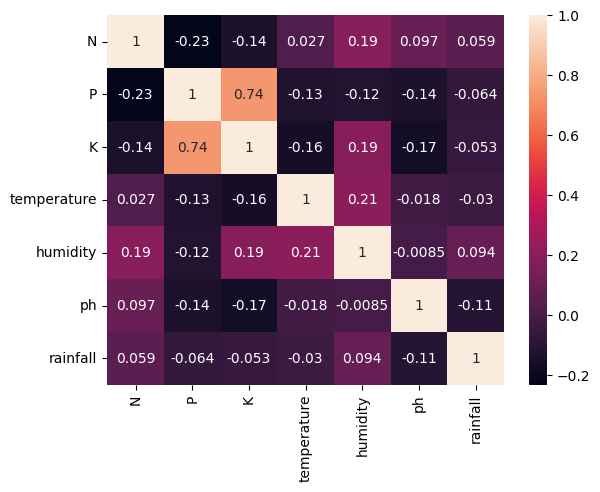

In [21]:
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# df['main_crop'] = le.fit_transform(df['main_crop'])

# fit and transform the 'main_crop' column
df['main_crop_encoded'] = le.fit_transform(df['main_crop'])

# get the mapping of the integer codes to the original string values
crop_mapping = dict(zip(le.transform(le.classes_), le.classes_))

# apply inverse_transform() to get back the original string values
df['main_crop'] = df['main_crop_encoded'].apply(lambda x: crop_mapping[x])

In [23]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
features2 = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall','main_crop_encoded']]
target = df['main_crop']
target1 = df['comp_crop']
target2 = df['trap_crop']
labels = df['main_crop']

In [24]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []
model1 = []
model2 = []

In [25]:
# Splitting into train and test data 

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.8,random_state =4)

In [26]:
# Splitting into train and test data comp_crops

from sklearn.model_selection import train_test_split
Xtrain1, Xtest1, Ytrain1, Ytest1 = train_test_split(features2,target1,test_size = 0.8,random_state =4)

In [27]:
# Splitting into train and test data comp_crops

from sklearn.model_selection import train_test_split
Xtrain2, Xtest2, Ytrain2, Ytest2 = train_test_split(features2,target2,test_size = 0.8,random_state =4)

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('DT-MC')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  84.60227272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        77
      banana       0.99      1.00      0.99        72
   blackgram       0.60      0.99      0.75        76
    chickpea       1.00      0.98      0.99        86
     coconut       0.99      1.00      0.99        73
      coffee       0.99      0.89      0.94        76
      cotton       0.82      1.00      0.90        80
      grapes       1.00      1.00      1.00        80
        jute       0.63      0.85      0.73        81
 kidneybeans       0.44      0.77      0.56        84
      lentil       0.63      1.00      0.77        82
       maize       0.89      0.99      0.94        77
       mango       1.00      1.00      1.00        83
   mothbeans       0.00      0.00      0.00        78
    mungbean       0.96      0.93      0.94        81
   muskmelon       0.99      1.00      0.99        80
      orange       0.93      1.00

In [29]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree1 = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree1.fit(Xtrain1,Ytrain1)

predicted_values = DecisionTree1.predict(Xtest1)
x = metrics.accuracy_score(Ytest1, predicted_values)
acc.append(x)
model.append('DT-CC')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest1,predicted_values))

DecisionTrees's Accuracy is:  93.69318181818181
                precision    recall  f1-score   support

       Alfalfa       0.94      1.00      0.97        80
         Beans       1.00      1.00      1.00        84
       Carrots       0.00      0.00      0.00        84
     Coriander       1.00      1.00      1.00        85
          Corn       1.00      0.98      0.99        86
          Dill       1.00      1.00      1.00        81
      Duckweed       1.00      1.00      1.00        84
      Marigold       0.62      0.99      0.77       153
      Rosemary       1.00      1.00      1.00        78
Sweet Potatoes       1.00      1.00      1.00        72
        banana       1.00      1.00      1.00        82
         beans       0.85      0.89      0.87        76
       berries       1.00      1.00      1.00        80
     buckwheat       1.00      1.00      1.00        78
       cabbage       1.00      1.00      1.00        81
       carrots       0.97      0.85      0.91        81

In [30]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree2 = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree2.fit(Xtrain2,Ytrain2)

predicted_values = DecisionTree2.predict(Xtest2)
x = metrics.accuracy_score(Ytest2, predicted_values)
acc.append(x)
model.append('DT-TC')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest2,predicted_values))

DecisionTrees's Accuracy is:  89.88636363636363
              precision    recall  f1-score   support

    Amarnath       0.96      1.00      0.98        78
   Desmodium       1.00      0.98      0.99        86
  Dill Plant       0.97      1.00      0.99        72
    Marigold       0.55      0.60      0.57       159
      Millet       1.00      0.93      0.97       163
     Mustard       1.00      1.00      1.00       168
     Parsley       1.00      0.85      0.92        81
Pearl Millet       1.00      1.00      1.00        84
Pusa Basmati       0.99      1.00      0.99        84
         Rye       1.00      1.00      1.00        78
    Sesbania       0.96      1.00      0.98       165
   Sunflower       0.00      0.00      0.00        80
     Tobacco       0.90      1.00      0.95        80
      Zinnia       1.00      1.00      1.00        73
      castor       0.54      0.99      0.70        76
     sorghum       1.00      0.99      0.99        77
sweet clover       0.99      1.00

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [33]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### Saving trained Decision Tree model

In [34]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('NB-MC')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9903409090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        77
      banana       1.00      1.00      1.00        72
   blackgram       1.00      1.00      1.00        76
    chickpea       1.00      1.00      1.00        86
     coconut       1.00      1.00      1.00        73
      coffee       0.99      1.00      0.99        76
      cotton       0.99      1.00      0.99        80
      grapes       1.00      1.00      1.00        80
        jute       0.86      0.98      0.91        81
 kidneybeans       1.00      1.00      1.00        84
      lentil       1.00      0.99      0.99        82
       maize       1.00      0.99      0.99        77
       mango       1.00      1.00      1.00        83
   mothbeans       0.99      1.00      0.99        78
    mungbean       1.00      1.00      1.00        81
   muskmelon       1.00      1.00      1.00        80
      orange       1.00      1.00 

In [36]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes2 = GaussianNB()

NaiveBayes2.fit(Xtrain1,Ytrain1)

predicted_values = NaiveBayes2.predict(Xtest1)
x = metrics.accuracy_score(Ytest1, predicted_values)
acc.append(x)
model.append('NB-CC')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest1,predicted_values))

Naive Bayes's Accuracy is:  1.0
                precision    recall  f1-score   support

       Alfalfa       1.00      1.00      1.00        80
         Beans       1.00      1.00      1.00        84
       Carrots       1.00      1.00      1.00        84
     Coriander       1.00      1.00      1.00        85
          Corn       1.00      1.00      1.00        86
          Dill       1.00      1.00      1.00        81
      Duckweed       1.00      1.00      1.00        84
      Marigold       1.00      1.00      1.00       153
      Rosemary       1.00      1.00      1.00        78
Sweet Potatoes       1.00      1.00      1.00        72
        banana       1.00      1.00      1.00        82
         beans       1.00      1.00      1.00        76
       berries       1.00      1.00      1.00        80
     buckwheat       1.00      1.00      1.00        78
       cabbage       1.00      1.00      1.00        81
       carrots       1.00      1.00      1.00        81
     cucumbers 

In [37]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes3 = GaussianNB()

NaiveBayes3.fit(Xtrain2,Ytrain2)

predicted_values = NaiveBayes3.predict(Xtest2)
x = metrics.accuracy_score(Ytest2, predicted_values)
acc.append(x)
model.append('NB-TC')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest2,predicted_values))

Naive Bayes's Accuracy is:  0.9534090909090909
              precision    recall  f1-score   support

    Amarnath       1.00      1.00      1.00        78
   Desmodium       1.00      1.00      1.00        86
  Dill Plant       1.00      1.00      1.00        72
    Marigold       1.00      0.48      0.65       159
      Millet       1.00      1.00      1.00       163
     Mustard       1.00      1.00      1.00       168
     Parsley       1.00      1.00      1.00        81
Pearl Millet       1.00      1.00      1.00        84
Pusa Basmati       1.00      1.00      1.00        84
         Rye       1.00      1.00      1.00        78
    Sesbania       0.67      1.00      0.80       165
   Sunflower       1.00      1.00      1.00        80
     Tobacco       1.00      1.00      1.00        80
      Zinnia       1.00      1.00      1.00        73
      castor       1.00      1.00      1.00        76
     sorghum       1.00      1.00      1.00        77
sweet clover       1.00      1.00 

In [38]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [39]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes2,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [40]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes3,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [41]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [42]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM-MC')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9732954545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        77
      banana       1.00      1.00      1.00        72
   blackgram       0.95      1.00      0.97        76
    chickpea       1.00      1.00      1.00        86
     coconut       1.00      1.00      1.00        73
      coffee       0.97      1.00      0.99        76
      cotton       0.98      1.00      0.99        80
      grapes       1.00      1.00      1.00        80
        jute       0.78      0.98      0.87        81
 kidneybeans       0.87      1.00      0.93        84
      lentil       0.98      0.98      0.98        82
       maize       1.00      0.97      0.99        77
       mango       1.00      1.00      1.00        83
   mothbeans       0.99      0.97      0.98        78
    mungbean       1.00      1.00      1.00        81
   muskmelon       0.99      1.00      0.99        80
      orange       1.00      1.00      1.0

In [43]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm1 = MinMaxScaler().fit(Xtrain1)
X_train_norm = norm1.transform(Xtrain1)
# transform testing dataabs
X_test_norm = norm1.transform(Xtest1)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain1)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest1, predicted_values)
acc.append(x)
model.append('SVM-CC')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest1,predicted_values))

SVM's Accuracy is:  1.0
                precision    recall  f1-score   support

       Alfalfa       1.00      1.00      1.00        80
         Beans       1.00      1.00      1.00        84
       Carrots       1.00      1.00      1.00        84
     Coriander       1.00      1.00      1.00        85
          Corn       1.00      1.00      1.00        86
          Dill       1.00      1.00      1.00        81
      Duckweed       1.00      1.00      1.00        84
      Marigold       1.00      1.00      1.00       153
      Rosemary       1.00      1.00      1.00        78
Sweet Potatoes       1.00      1.00      1.00        72
        banana       1.00      1.00      1.00        82
         beans       1.00      1.00      1.00        76
       berries       1.00      1.00      1.00        80
     buckwheat       1.00      1.00      1.00        78
       cabbage       1.00      1.00      1.00        81
       carrots       1.00      1.00      1.00        81
     cucumbers       1.

In [44]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm2 = MinMaxScaler().fit(Xtrain2)
X_train_norm = norm2.transform(Xtrain2)
# transform testing dataabs
X_test_norm = norm2.transform(Xtest2)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain2)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest2, predicted_values)
acc.append(x)
model.append('SVM-TC')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest2,predicted_values))

SVM's Accuracy is:  1.0
              precision    recall  f1-score   support

    Amarnath       1.00      1.00      1.00        78
   Desmodium       1.00      1.00      1.00        86
  Dill Plant       1.00      1.00      1.00        72
    Marigold       1.00      1.00      1.00       159
      Millet       1.00      1.00      1.00       163
     Mustard       1.00      1.00      1.00       168
     Parsley       1.00      1.00      1.00        81
Pearl Millet       1.00      1.00      1.00        84
Pusa Basmati       1.00      1.00      1.00        84
         Rye       1.00      1.00      1.00        78
    Sesbania       1.00      1.00      1.00       165
   Sunflower       1.00      1.00      1.00        80
     Tobacco       1.00      1.00      1.00        80
      Zinnia       1.00      1.00      1.00        73
      castor       1.00      1.00      1.00        76
     sorghum       1.00      1.00      1.00        77
sweet clover       1.00      1.00      1.00        80
   

In [45]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [46]:
#Saving trained SVM model

In [47]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('LR-MC')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9232954545454546
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        77
      banana       0.97      1.00      0.99        72
   blackgram       0.81      0.84      0.83        76
    chickpea       1.00      1.00      1.00        86
     coconut       1.00      1.00      1.00        73
      coffee       0.96      1.00      0.98        76
      cotton       0.93      0.94      0.93        80
      grapes       1.00      1.00      1.00        80
        jute       0.70      0.90      0.79        81
 kidneybeans       0.99      0.99      0.99        84
      lentil       0.84      0.94      0.89        82
       maize       0.89      0.87      0.88        77
       mango       0.95      0.98      0.96        83
   mothbeans       0.81      0.77      0.79        78
    mungbean       0.98      0.99      0.98        81
   muskmelon       1.00      1.00      1.00        80
      orange       1.00   

In [49]:
from sklearn.linear_model import LogisticRegression

LogReg1 = LogisticRegression(random_state=2)

LogReg1.fit(Xtrain1,Ytrain1)

predicted_values = LogReg1.predict(Xtest1)

x = metrics.accuracy_score(Ytest1, predicted_values)
acc.append(x)
model.append('LR-CC')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest1,predicted_values))

Logistic Regression's Accuracy is:  0.9676136363636364
                precision    recall  f1-score   support

       Alfalfa       1.00      0.97      0.99        80
         Beans       1.00      0.92      0.96        84
       Carrots       0.98      1.00      0.99        84
     Coriander       1.00      1.00      1.00        85
          Corn       1.00      1.00      1.00        86
          Dill       1.00      1.00      1.00        81
      Duckweed       0.90      0.82      0.86        84
      Marigold       0.99      0.97      0.98       153
      Rosemary       0.92      0.92      0.92        78
Sweet Potatoes       1.00      1.00      1.00        72
        banana       0.93      0.78      0.85        82
         beans       0.92      1.00      0.96        76
       berries       1.00      1.00      1.00        80
     buckwheat       1.00      1.00      1.00        78
       cabbage       0.96      1.00      0.98        81
       carrots       0.88      0.95      0.91   

In [50]:
from sklearn.linear_model import LogisticRegression

LogReg2 = LogisticRegression(random_state=2)

LogReg2.fit(Xtrain2,Ytrain2)

predicted_values = LogReg2.predict(Xtest2)

x = metrics.accuracy_score(Ytest2, predicted_values)
acc.append(x)
model.append('LR-TC')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest2,predicted_values))

Logistic Regression's Accuracy is:  0.9096590909090909
              precision    recall  f1-score   support

    Amarnath       1.00      1.00      1.00        78
   Desmodium       1.00      1.00      1.00        86
  Dill Plant       0.96      1.00      0.98        72
    Marigold       0.78      0.98      0.87       159
      Millet       0.93      0.78      0.85       163
     Mustard       0.95      0.99      0.97       168
     Parsley       0.79      0.96      0.87        81
Pearl Millet       0.91      0.74      0.82        84
Pusa Basmati       0.72      0.75      0.74        84
         Rye       0.78      0.76      0.77        78
    Sesbania       0.86      0.68      0.76       165
   Sunflower       1.00      1.00      1.00        80
     Tobacco       1.00      1.00      1.00        80
      Zinnia       0.99      1.00      0.99        73
      castor       0.96      1.00      0.98        76
     sorghum       1.00      0.99      0.99        77
sweet clover       1.00   

In [51]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

### Saving trained Logistic Regression model

In [52]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF-MC')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9784090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        77
      banana       1.00      1.00      1.00        72
   blackgram       0.97      0.99      0.98        76
    chickpea       1.00      1.00      1.00        86
     coconut       1.00      1.00      1.00        73
      coffee       0.99      0.96      0.97        76
      cotton       0.98      1.00      0.99        80
      grapes       1.00      1.00      1.00        80
        jute       0.76      0.99      0.86        81
 kidneybeans       0.99      1.00      0.99        84
      lentil       0.96      0.98      0.97        82
       maize       0.96      0.99      0.97        77
       mango       1.00      1.00      1.00        83
   mothbeans       0.99      0.95      0.97        78
    mungbean       1.00      1.00      1.00        81
   muskmelon       1.00      1.00      1.00        80
      orange       1.00      1.00      1.00

In [54]:
#comp_crops
from sklearn.ensemble import RandomForestClassifier

RF1 = RandomForestClassifier(n_estimators=20, random_state=0)
RF1.fit(Xtrain1,Ytrain1)

predicted_values = RF1.predict(Xtest1)

x = metrics.accuracy_score(Ytest1, predicted_values)
acc.append(x)
model.append('RF-CC')
print("RF1's Accuracy is: ", x)

print(classification_report(Ytest1,predicted_values))

RF1's Accuracy is:  0.9977272727272727
                precision    recall  f1-score   support

       Alfalfa       0.99      1.00      0.99        80
         Beans       1.00      1.00      1.00        84
       Carrots       1.00      1.00      1.00        84
     Coriander       1.00      1.00      1.00        85
          Corn       1.00      1.00      1.00        86
          Dill       1.00      1.00      1.00        81
      Duckweed       1.00      0.99      0.99        84
      Marigold       0.99      0.99      0.99       153
      Rosemary       1.00      1.00      1.00        78
Sweet Potatoes       1.00      1.00      1.00        72
        banana       1.00      1.00      1.00        82
         beans       1.00      0.97      0.99        76
       berries       1.00      1.00      1.00        80
     buckwheat       1.00      1.00      1.00        78
       cabbage       1.00      1.00      1.00        81
       carrots       0.99      1.00      0.99        81
     cuc

In [55]:
#trap_crops
from sklearn.ensemble import RandomForestClassifier

RF2 = RandomForestClassifier(n_estimators=20, random_state=0)
RF2.fit(Xtrain2,Ytrain2)

predicted_values = RF2.predict(Xtest2)

x = metrics.accuracy_score(Ytest2, predicted_values)
acc.append(x)
model.append('RF-TC')
print("RF2's Accuracy is: ", x)

print(classification_report(Ytest2,predicted_values))

RF2's Accuracy is:  0.9994318181818181
              precision    recall  f1-score   support

    Amarnath       1.00      1.00      1.00        78
   Desmodium       1.00      0.99      0.99        86
  Dill Plant       1.00      1.00      1.00        72
    Marigold       1.00      1.00      1.00       159
      Millet       1.00      1.00      1.00       163
     Mustard       1.00      1.00      1.00       168
     Parsley       0.99      1.00      0.99        81
Pearl Millet       1.00      1.00      1.00        84
Pusa Basmati       1.00      1.00      1.00        84
         Rye       1.00      1.00      1.00        78
    Sesbania       1.00      1.00      1.00       165
   Sunflower       1.00      1.00      1.00        80
     Tobacco       1.00      1.00      1.00        80
      Zinnia       1.00      1.00      1.00        73
      castor       1.00      1.00      1.00        76
     sorghum       1.00      1.00      1.00        77
sweet clover       1.00      1.00      1.0

In [56]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [57]:
# Cross validation score (Random Forest) comp_crops
score = cross_val_score(RF1,features,target1,cv=5)
score

array([0.99090909, 0.98863636, 0.99318182, 0.99090909, 0.99318182])

In [58]:
# Cross validation score (Random Forest) trap_crops
score = cross_val_score(RF2,features,target2,cv=5)
score

array([0.99318182, 0.99772727, 0.99545455, 0.99318182, 0.99090909])

### Saving trained Random Forest model

In [59]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [60]:
#comp_crops

import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest1.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF1, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [61]:
#trap_crops

import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest2.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF1, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

In [62]:
print(model)

['DT-MC', 'DT-CC', 'DT-TC', 'NB-MC', 'NB-CC', 'NB-TC', 'SVM-MC', 'SVM-CC', 'SVM-TC', 'LR-MC', 'LR-CC', 'LR-TC', 'RF-MC', 'RF-CC', 'RF-TC']


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Algorithm', ylabel='Accuracy'>

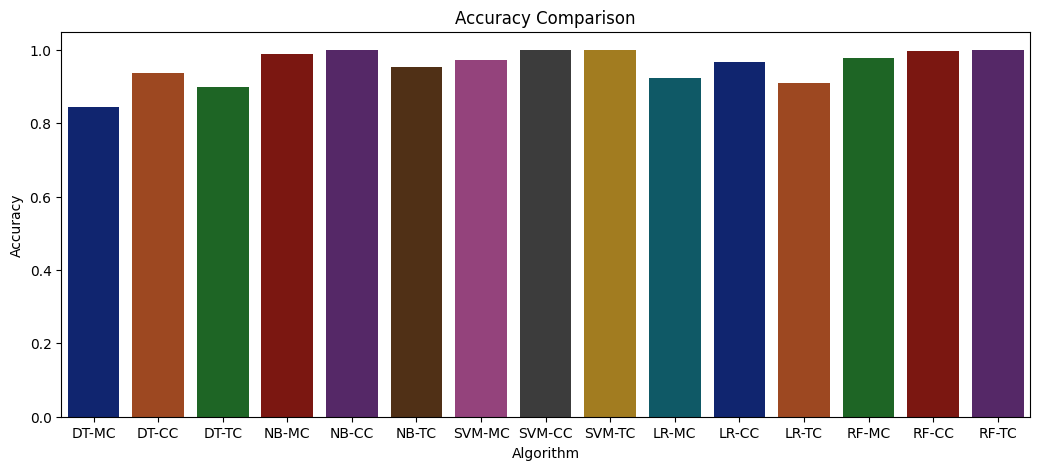

In [72]:
plt.figure(figsize=[12.5,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x = model,y = acc,palette='dark')

In [64]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
  if k in ['NB-MC', 'RF-CC', 'RF-TC']:
    print (k, '-->', v)

NB-MC --> 0.9903409090909091
RF-CC --> 0.9977272727272727
RF-TC --> 0.9994318181818181


In [65]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
  print (k, '-->', v)

DT-MC --> 0.8460227272727273
DT-CC --> 0.9369318181818181
DT-TC --> 0.8988636363636363
NB-MC --> 0.9903409090909091
NB-CC --> 1.0
NB-TC --> 0.9534090909090909
SVM-MC --> 0.9732954545454545
SVM-CC --> 1.0
SVM-TC --> 1.0
LR-MC --> 0.9232954545454546
LR-CC --> 0.9676136363636364
LR-TC --> 0.9096590909090909
RF-MC --> 0.9784090909090909
RF-CC --> 0.9977272727272727
RF-TC --> 0.9994318181818181


## Making a prediction

In [81]:
data = np.array([[70,39, 60, 23.603016, 60.3, 6.7, 140.91]])
Main_Crop_Prediction = NaiveBayes.predict(data)
encoded = le.transform([Main_Crop_Prediction])
data1 = np.array([[70,39, 60, 23.603016, 60.3, 6.7, 140.91,encoded]])
Comanion_Crop_prediction = RF1.predict(data1)
Trap_Crop_Prediction = RF2.predict(data1)
print("Main-Crop: "+str(Main_Crop_Prediction))
print("Companion-Crop: "+str(Comanion_Crop_prediction))
print("Trap-Crop: "+str(Trap_Crop_Prediction))

Main-Crop: ['jute']
Companion-Crop: ['carrots']
Trap-Crop: ['Parsley']


In [82]:
data = np.array([[91,57, 42, 21.853135, 80.9, 5.5, 243.83]])
Main_Crop_Prediction = NaiveBayes.predict(data)
encoded = le.transform([Main_Crop_Prediction])
data1 = np.array([[91,57, 42, 21.853135, 80.9, 5.5, 243.83,encoded]])
Comanion_Crop_prediction = RF1.predict(data1)
Trap_Crop_Prediction = RF2.predict(data1)
print("Main-Crop: "+str(Main_Crop_Prediction))
print("Companion-Crop: "+str(Comanion_Crop_prediction))
print("Trap-Crop: "+str(Trap_Crop_Prediction))

Main-Crop: ['rice']
Companion-Crop: ['Duckweed']
Trap-Crop: ['Pusa Basmati']
